<a href="https://colab.research.google.com/github/hafanhh/Telco-Predicting-Customer-Churn-in-Python/blob/main/Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

## 1. Import Data

In [83]:
file = 'https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv'
telco = pd.read_csv(file)
print(telco.head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  ...  Intl_Charge  State  Area_Code     Phone
0             128             25     265.1     197.4  ...         2.70     KS        415  382-4657
1             107             26     161.6     195.5  ...         3.70     OH        415  371-7191
2             137              0     243.4     121.2  ...         3.29     NJ        415  358-1921
3              84              0     299.4      61.9  ...         1.78     OH        408  375-9999
4              75              0     166.7     148.3  ...         2.73     OK        415  330-6626

[5 rows x 21 columns]


## 2. Exploring customer churn

2.1. How many churners does the dataset have, and how many non-churners?

In [84]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

There are 483 Churners and 2850 Non-Churners. It looks like there are far more Non-Churners than Churners in dataset.

### 2.2. Summary statistics for both classes
 * To explore the 'Churn' column further to see if there are differences between churners and non-churners.

In [85]:
# Group telco by 'Churn' and compute the mean
print(telco.groupby(['Churn'])[['CustServ_Calls', 'Vmail_Message']].mean())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.449825       8.604561
yes          2.229814       5.115942


In [86]:
# Group telco by 'Churn' and compute the standard deviation
print(telco.groupby(['Churn'])[['CustServ_Calls', 'Vmail_Message']].std())

       CustServ_Calls  Vmail_Message
Churn                               
no           1.163883      13.913125
yes          1.853275      11.860138


Churners seem to make more customer service calls than non-churners

### 2.3. Churn by State
* When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not.

In [87]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


 While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned.

### 2.4. The distribution of account length
* To understand how the variables are distributed

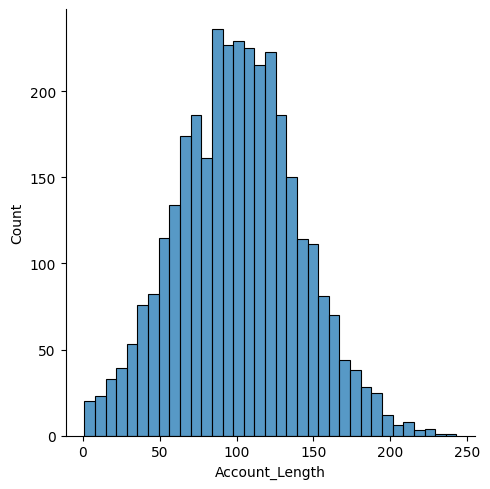

In [88]:
# Visualize the distribution of account length
sns.displot(telco['Account_Length'])
plt.show()

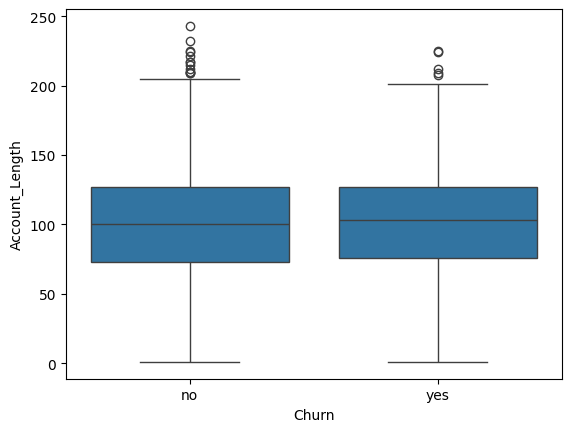

In [89]:
# Visualize the differences in account length
sns.boxplot(x = 'Churn', y= 'Account_Length', data = telco)
plt.show()

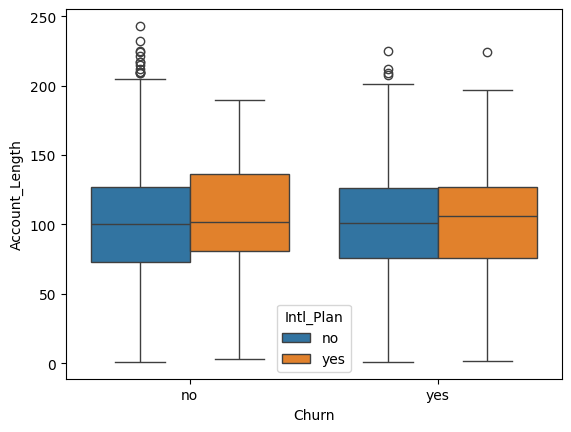

In [90]:
# Visualize the differences in account length whether the International plan had impact on account length or churn
sns.boxplot(x = 'Churn', y= 'Account_Length', data = telco, hue = 'Intl_Plan')
plt.show()

### 2.5. The distribution of 'Day_Mins'

<ipython-input-91-3b7dceb6fe5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Day_Mins'])


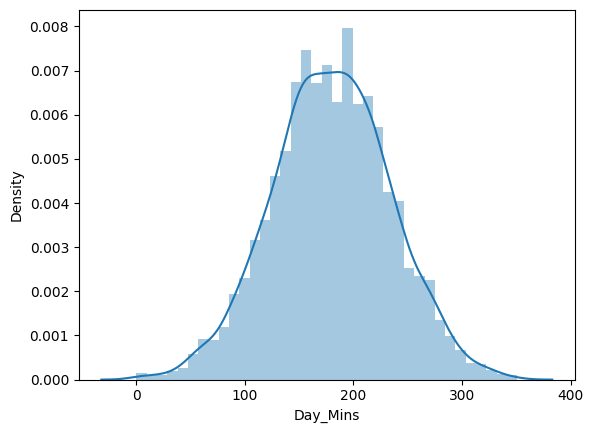

In [91]:
# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])
plt.show()

### 2.6. The distribution of 'Eve_Mins'

<ipython-input-92-a685f6774b94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Eve_Mins'])


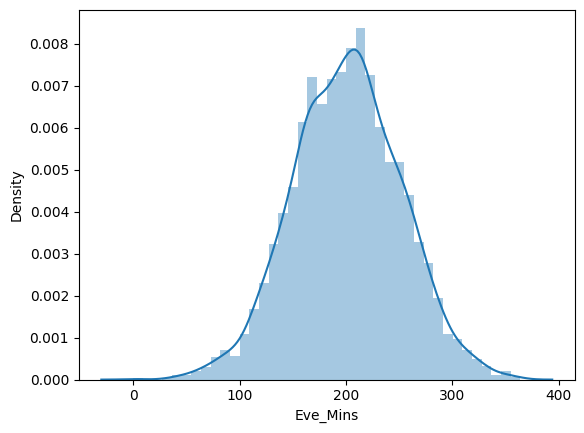

In [92]:
# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

### 2.7. The distribution of 'Night_Mins'

<ipython-input-93-f6fa648a9b47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Night_Mins'])


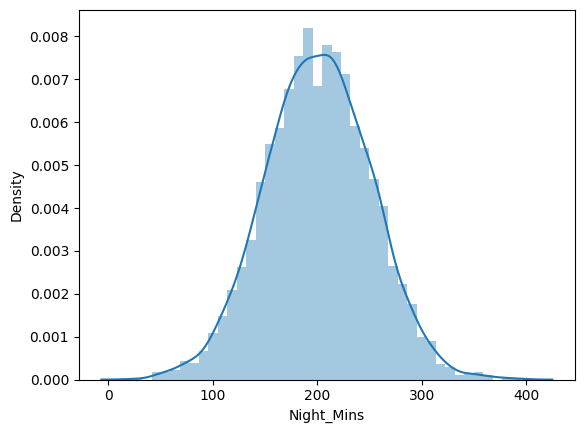

In [93]:
# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

### 2.8. The distribution of 'Intl_Mins'

<ipython-input-94-d81711501e2c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Intl_Mins'])


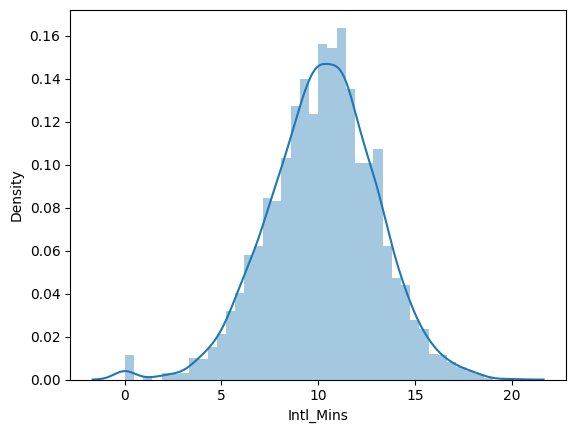

In [94]:
# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

### 2.9. Customer service calls and Churn
* It is already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

* To visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans?

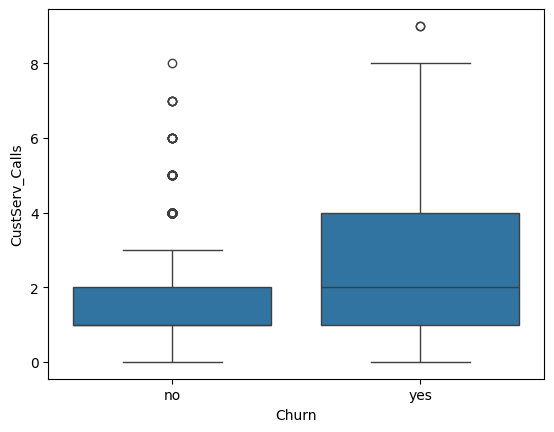

In [95]:
# Create the box plot to see differences between churners and no-churners of customer service calls
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco)
plt.show()

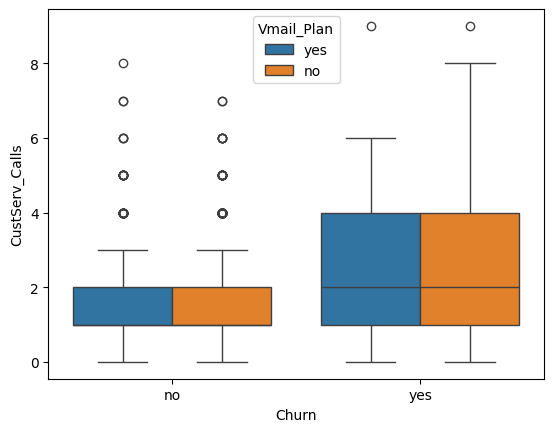

In [96]:
# Visualize whether or not having a voice mail plan affects the number of customer service calls or churn
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            hue = "Vmail_Plan")
plt.show()

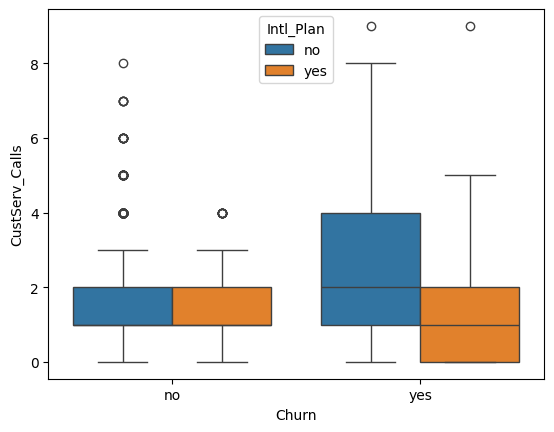

In [97]:
# Visualize whether or not having a International plan affects the number of customer service calls or churn
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            hue = "Intl_Plan")
plt.show()

There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

## 3. Data Preparation

In [98]:
# Check data types
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [99]:
# Calculate statistic summary
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


### 3.1. Data Preprocessing

In [100]:
# Encode 'Intl_plan'
label_encoder = LabelEncoder()
telco['Intl_Plan'] = label_encoder.fit_transform(telco['Intl_Plan'])
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [101]:
# Encode 'Vmail_Plan'
label_encoder = LabelEncoder()
telco['Vmail_Plan'] = label_encoder.fit_transform(telco['Vmail_Plan'])
telco['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

In [102]:
# Encode 'Churn'
label_encoder = LabelEncoder()
telco['Churn'] = label_encoder.fit_transform(telco['Churn'])
telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [103]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  ...  RI  SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY
0   0   0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0   0   0   0

[5 rows x 51 columns]


In [104]:
# Scale telco using StandardScaler
telco[["Intl_Calls", "Night_Mins"]] = StandardScaler().fit_transform(telco[["Intl_Calls", "Night_Mins"]])
print(telco[["Intl_Calls", "Night_Mins"]])

      Intl_Calls  Night_Mins
0      -0.601195    0.866743
1      -0.601195    1.058571
2       0.211534   -0.756869
3       1.024263   -0.078551
4      -0.601195   -0.276311
...          ...         ...
3328    0.617898    1.547039
3329   -0.194831   -0.189297
3330    0.617898   -0.177431
3331    2.243356   -1.219628
3332   -0.194831    0.801482

[3333 rows x 2 columns]


### 3.2. Feature enginerring
* Dropping unnecessary features

Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling.

In [105]:
telco.columns


Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [106]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code', 'Phone'], axis = 1)
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


* Engineering a new column

In [107]:
# Create the new feature
telco['Avg_Night_Calls'] = telco["Night_Mins"]/telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head(5))

0    0.009525
1    0.010277
2   -0.007278
3   -0.000883
4   -0.002284
Name: Avg_Night_Calls, dtype: float64


## 4. Churn Prediction

In [108]:
# Create feature variable
X = telco.drop(['Churn','State'], axis=1)

# Create target variable
y = telco['Churn']

In [109]:
# Split dataset as training and testing set
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [110]:
telco['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### 4.1 Support Vector Machines

In [111]:
# Instantiate the SCV classifier
svc = SVC()

# Fit model to data
svc.fit(X_train, y_train)

# Compute accuracy
print(svc.score(X_test, y_test))

# Predict the labels of the test set
y_pred = svc.predict(X_test)

0.857


In [112]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[857   0]
 [143   0]]


In [113]:
# Print the precision
print(precision_score(y_test, y_pred))

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# Print the recall
print(recall_score(y_test, y_pred))

0.0


### 4.2. Logistic Regression

In [115]:
# Instantiate the classifier
lg = LogisticRegression()

# Fit model to data
lg.fit(X_train, y_train)

# Compute accuracy
print(lg.score(X_test, y_test))

# Predict the labels of the test set
y_pred = lg.predict(X_test)

0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[829  28]
 [122  21]]


In [117]:
# Print the precision
print(precision_score(y_test, y_pred))

0.42857142857142855


In [118]:
# Print the recall
print(recall_score(y_test, y_pred))

0.14685314685314685


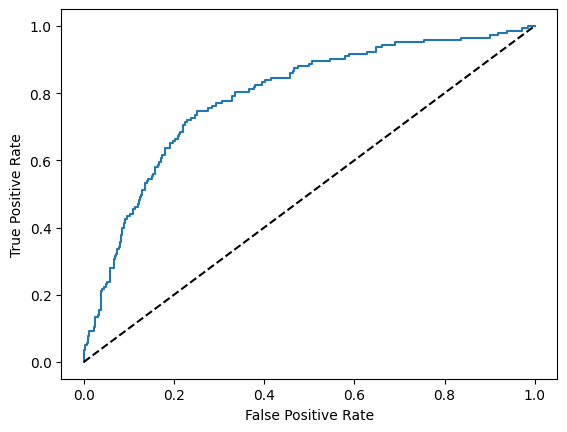

In [119]:
# Generate the probabilities
y_pred_prob = lg.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [120]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.7901118717921518


In [121]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.21875


### 4.3. Decision Tree

In [122]:
# Instantiate the classifier
dct = DecisionTreeClassifier()

# Fit the classifier
dct.fit(X_train, y_train)

# Compute accuracy
print(dct.score(X_test, y_test))

# Predict the labels of the test set
y_pred = dct.predict(X_test)

0.908


In [123]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[804  53]
 [ 39 104]]


In [124]:
# Print the precision
print(precision_score(y_test, y_pred))

0.6624203821656051


In [125]:
# Print the recall
print(recall_score(y_test, y_pred))

0.7272727272727273


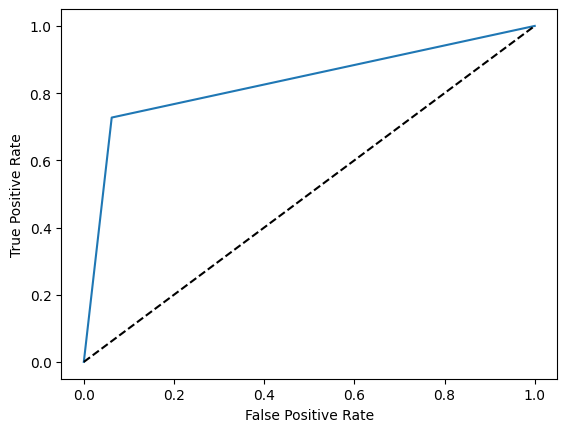

In [126]:
# Generate the probabilities
y_pred_prob = dct.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [127]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8327145433329797


In [128]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.6933333333333332


### 4.4. Random Forest

In [129]:
# Instantiate the classifier
rdf = RandomForestClassifier()

# Fit to the training data
rdf.fit(X_train, y_train)

# Compute accuracy
print(rdf.score(X_test, y_test))

# Predict the labels of the test set
y_pred = rdf.predict(X_test)

0.948


In [130]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[852   5]
 [ 47  96]]


In [131]:
# Print the precision
print(precision_score(y_test, y_pred))

0.9504950495049505


In [132]:
# Print the recall
print(recall_score(y_test, y_pred))

0.6713286713286714


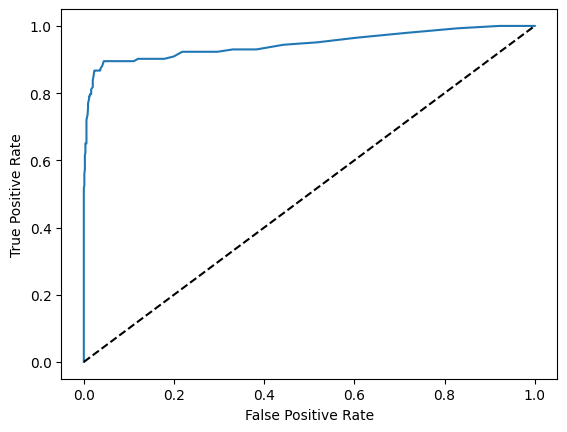

In [133]:
# Generate the probabilities
y_pred_prob = rdf.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [134]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9457083173535916


In [135]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.7868852459016393


### 4.5. AdaBoost

In [136]:
# Instantiate the classifier
ada = AdaBoostClassifier()

# Fit to the training data
ada.fit(X_train, y_train)

# Compute accuracy
print(ada.score(X_test, y_test))

# Predict the labels of the test set
y_pred = ada.predict(X_test)

0.878


In [137]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[832  25]
 [ 97  46]]


In [138]:
# Print the precision
print(precision_score(y_test, y_pred))

0.647887323943662


In [139]:
# Print the recall
print(recall_score(y_test, y_pred))

0.32167832167832167


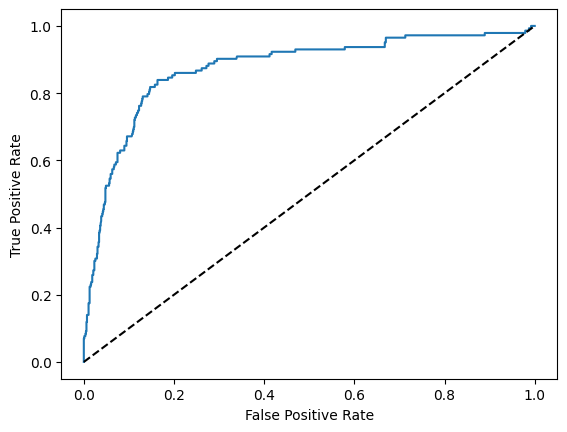

In [140]:
# Generate the probabilities
y_pred_prob = ada.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [141]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8744645086535402


In [142]:
# Print the F1 score
print(f1_score(y_test, y_pred))


0.42990654205607476


### 4.6. Gradient Boosting

In [143]:
# Instantiate the classifier
xgb = xgb.XGBClassifier()

# Fit to the training data
xgb.fit(X_train, y_train)

# Compute accuracy
print(xgb.score(X_test, y_test))

# Predict the labels of the test set
y_pred = xgb.predict(X_test)

0.956


In [144]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[849   8]
 [ 36 107]]


In [145]:
# Print the precision
print(precision_score(y_test, y_pred))

0.9304347826086956


In [146]:
# Print the recall
print(recall_score(y_test, y_pred))

0.7482517482517482


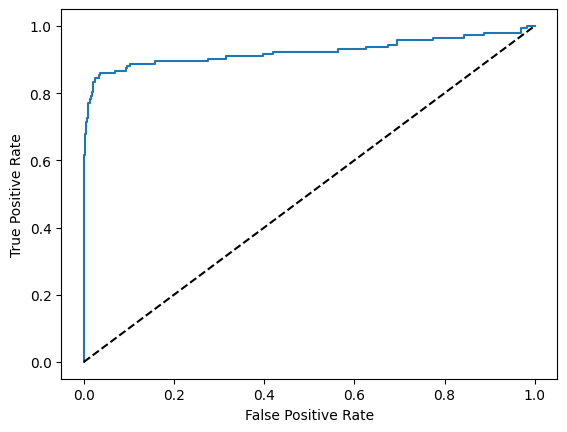

In [147]:
# Generate the probabilities
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [148]:
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9230361237362404


In [149]:
# Print the F1 score
print(f1_score(y_test, y_pred))

0.8294573643410852


### 4.7. Grid Search

* Ramdom Forest

In [150]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(rdf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


It looks like taking sqare root of the number of features leads to optimal model performance. By default, the model takes the square root of the number of features.

In [151]:
# Print the best score
print(grid_search.best_score_)

0.9561956195619562


### 4.8. Randomized Search

* Random Forest

In [152]:
# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(rdf, param_dist, cv=3)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7}


In [153]:
# Print the best score
print(grid_search.best_score_)

0.9561956195619562


### 4.9. Summary

* Model Selection:

The Random Forest classifier was chosen for the task, and it has demonstrated good performance based on various evaluation metrics.

* Hyperparameter Tuning:

Hyperparameter tuning was performed using RandomizedSearchCV, exploring different combinations of hyperparameters such as max_depth, max_features, bootstrap, and criterion.

* Best Hyperparameters:

The best hyperparameters found through the search were {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7}.

* Model Evaluation Metrics:

Accuracy: The accuracy of the model on the test set was computed and found to be around 94.8%.

Confusion Matrix: The confusion matrix revealed that the model performed well in correctly classifying both positive and negative instances.

Precision: The precision score indicates a high proportion of correctly predicted positive instances, with a value of approximately 95.05%.

Recall: The recall score, around 67.13%, suggests that the model is capturing a substantial portion of actual positive instances.

AUC-ROC Score: The AUC-ROC score, a measure of the classifier's ability to distinguish between classes, was approximately 94.57%.

F1 Score: The F1 score, combining precision and recall, was around 78.69%.

## 5. Feature Importances

The model was trained on a dataset with 21 features. Understanding the importance of these features in the context of the model's predictions could provide insights into the factors influencing customer churn.

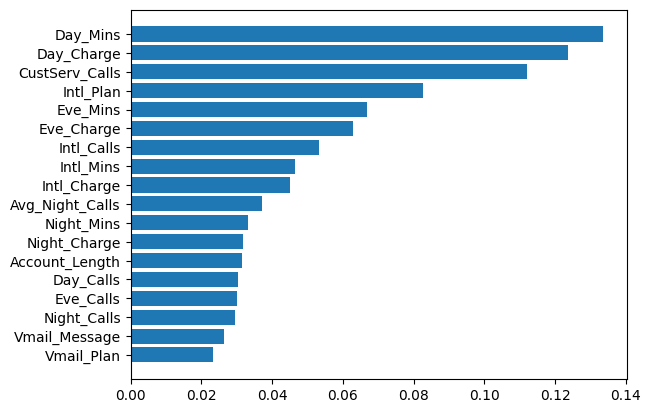

In [154]:
# Calculate feature importances
importances = rdf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn.

## 6. Recommendations



Based on the analysis of feature importance in the Random Forest model, which indicates that "CustServ_Calls," "Day_Mins," and "Day_Charge" are the most influential factors for predicting customer churn, here are some recommendations:

* CustServ_Calls:

Recommendation: Investigate and address the reasons behind customers making multiple customer service calls. Frequent calls may indicate dissatisfaction or unresolved issues. Implement measures to enhance customer service quality, streamline issue resolution processes, and proactively address common concerns to reduce the need for repeated calls.

* Day_Mins:

Recommendation: Pay attention to customers who use a significant amount of daytime minutes. It could be an indication of heavy usage or potential dissatisfaction with the service. Consider personalized communication strategies, such as offering tailored plans or promotions, to meet the specific needs of high-usage customers and improve overall satisfaction.

* Day_Charge:

Recommendation: The correlation between "Day_Mins" and "Day_Charge" suggests that the cost associated with daytime usage is an important factor. Evaluate pricing structures to ensure they align with customer expectations and market standards. Consider offering competitive pricing plans or discounts for daytime usage to retain customers and attract new ones.

* Proactive Customer Engagement:

Recommendation: Implement proactive customer engagement strategies, such as targeted surveys or feedback mechanisms, to understand the specific concerns and preferences of customers. This can help identify issues early on and allow for timely intervention to prevent churn.

* Personalized Retention Offers:

Recommendation: Develop personalized retention offers for customers identified as high-risk based on the model's insights. This could include special discounts, loyalty rewards, or customized plans to incentivize them to stay with the service.

* Continuous Monitoring:

Recommendation: Customer behavior and preferences evolve over time. Implement a system for continuous monitoring of customer interactions, service usage patterns, and feedback to adapt retention strategies accordingly. Regularly update the model based on new data to ensure its effectiveness in predicting churn.

* Communication and Education:

Recommendation: Proactively communicate with customers about plan details, charges, and available features. Ensure that customers are well-informed about the value they receive from the service. Educational initiatives can help manage expectations and reduce dissatisfaction that might lead to churn.